## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [7]:
#
# Your code to import matplotlib, pandas and numpy libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




Following code loads the CIFAR 10 datset.

In [8]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
#
# Your code to print shapes of training and test data. Check how the data looks
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [10]:
# Your code to print the shape of one image.
x_train[0].shape

(32, 32, 3)

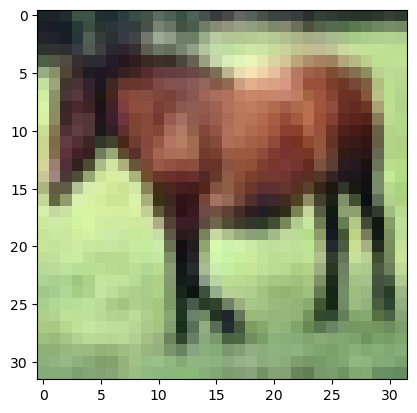

In [11]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[7]);

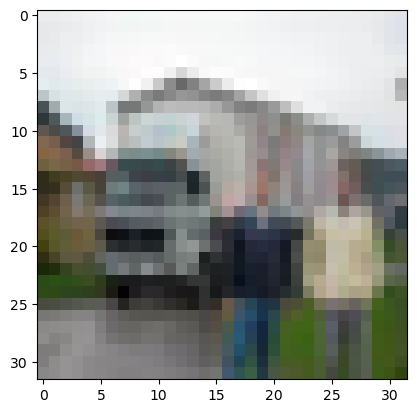

In [12]:
# Show any other image
plt.imshow(x_train[16])

# PreProcessing

In [13]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [14]:
# Your code to print shape of any image i.e particular value in the x_train
x_train.shape


(50000, 32, 32, 3)

In [15]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(x_train.max)


<built-in method max of numpy.ndarray object at 0x000002209EB21EF0>


In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
# Print the shape of x_train again.
print(x_train.shape)


(50000, 32, 32, 3)


In [22]:
# Print the shape of y_train again.
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


# One hot vector encoding.
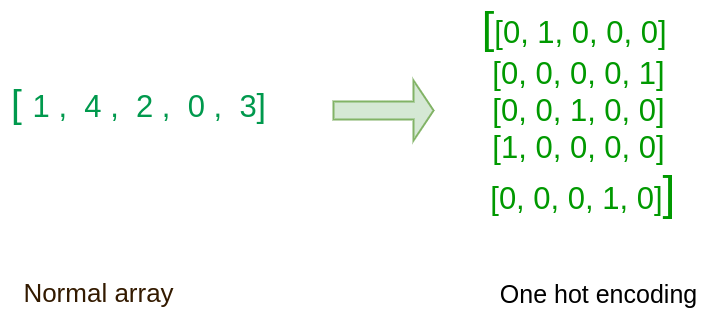


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [23]:
from tensorflow.keras.utils import to_categorical


# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train,10)

In [24]:
# Your code to print shape of y_train [0]
print(y_train[0].shape)

(1,)


In [25]:
# Your code to print shape of the array y_cat_train
print("Shape of y_cat_train:", y_cat_train.shape)

Shape of y_cat_train: (50000, 10)


In [26]:
# Your code to print any single value in the array y_cat_train
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [27]:
 #print y_train with the same index.
y_train[0]

array([6], dtype=uint8)

In [28]:



# Compare the result for better understanding of "to_categorical()"
y_cat_train = to_categorical(y_train,10)

In [29]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test,10)



In [30]:
# Print the shapes to look how y_cat_test looks.
print(y_cat_test.shape)

print(y_test[0])
print(y_cat_test[0])

(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


----------
# Building the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [50]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

# Additional layers can be added as needed

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=12, activation='relu'))

# Output layer
model.add(Dense(units=10, activation='softmax'))  # Example with 10 output classes, adjust as needed
model.add(Dense(units=11, activation='softmax'))
model.add(Dense(units=1, activation='softmax'))
# Compile the modelodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 flatten_11 (Flatten)        (None, 26912)             0         
                                                                 
 dense_26 (Dense)            (None, 128)               3444864   
                                                                 
 dense_27 (Dense)            (None, 11)                1419      
                                                                 
 dense_28 (Dense)            (None, 12)                144       
                                                                 
 dense_29 (Dense)            (None, 10)                130       
                                                                 
 dense_30 (Dense)            (None, 11)              

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [52]:

from tensorflow.keras.utils import to_categorical
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1)

y_train_encoded = to_categorical(y_train)


Epoch 1/150



C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)



1563/1563 [==============================] - 47s 29ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 2/150
1563/1563 [==============================] - 45s 29ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 3/150
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 4/150
1563/1563 [==============================] - 56s 36ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 5/150
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 6/150
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 7/150
1563/1563 [==============================] - 46s 29ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 8/150
1563/1563 [==============================] - 46s 30ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 9/150
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Epoch 10/150
1563/1563 [======

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))  # Example with 10 output classes, adjust as needed
model.add(Dense(units=11, activation='softmax'))
model.add(Dense(units=1, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Fit the model with early stopping
model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stop])




Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


640/640 [==============================] - 4s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1007 - val_loss: 0.0000e+00 - val_accuracy: 0.1008
Epoch 2/20
640/640 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1007 - val_loss: 0.0000e+00 - val_accuracy: 0.1008
Epoch 3/20
640/640 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1007 - val_loss: 0.0000e+00 - val_accuracy: 0.1008
Epoch 4/20
640/640 [==============================] - 4s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1007 - val_loss: 0.0000e+00 - val_accuracy: 0.1008


In [58]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your data stored in variables x_train, y_train
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))  # Example with 10 output classes, adjust as needed
model.add(Dense(units=11, activation='softmax'))
model.add(Dense(units=1, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with early stopping
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stop])

# Save the training parameters for each epoch
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Combine training parameters into history array
history_array = np.array([loss_history, accuracy_history, val_loss_history, val_accuracy_history])

# Now you can access training parameters for each epoch using history_array



Epoch 1/20
512/512 [==============================] - 4s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1047
Epoch 2/20
512/512 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1047
Epoch 3/20
512/512 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1047
Epoch 4/20
512/512 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1047


In [59]:
### We can save the model in a file. Following code shows how to do this.
# Save the model to a file
model.save("my_model.h5")


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [61]:
losses = pd.DataFrame(model.history.history)

In [62]:
# Print first few rows of losses.
print(losses)

   loss  accuracy  val_loss  val_accuracy
0   0.0  0.099731       0.0      0.104736
1   0.0  0.099731       0.0      0.104736
2   0.0  0.099731       0.0      0.104736
3   0.0  0.099731       0.0      0.104736


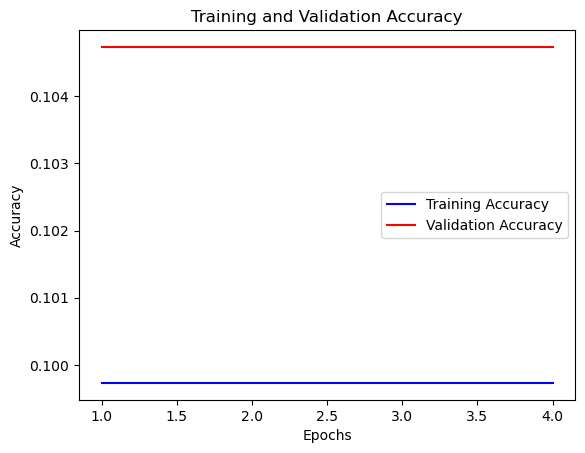

In [64]:
### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 
# Extract accuracy and validation accuracy from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


# Create a range of epochs
epochs = range(1, len(accuracy) + 1)

#Plot accuracy and validity accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


#Show the plot
plt.show()



In [ ]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#

In [ ]:
# 
# Your code to plot loss and val_loss vs the epochs
#

In [ ]:
### You could print the metrics name that model have used.

### Following code shows how to do this.

In [65]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

### Make a prediction on test data set.   

In [ ]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

### We could get the full classification report. 

In [66]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report



In [ ]:
classification_report(y_test, predictions)

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [67]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix



In [ ]:
confusion_matrix(y_test,predictions)

313/313 [==============================] - 1s 2ms/step


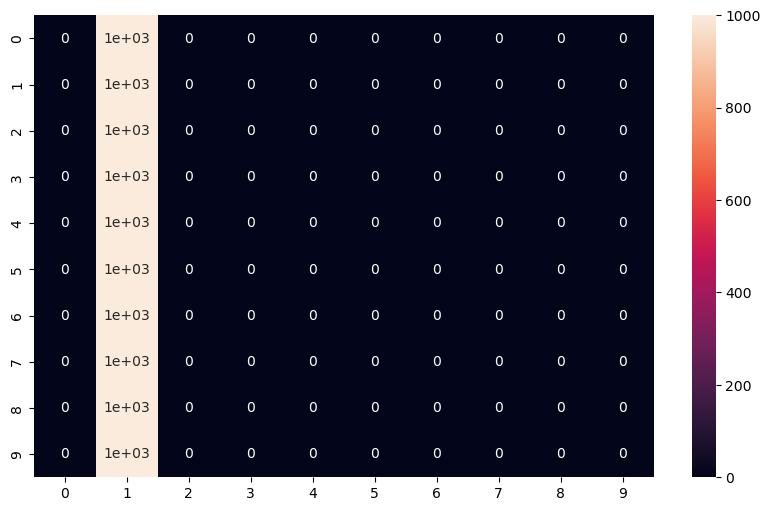

In [71]:
#import seaborn as sns

#plt.figure(figsize=(10,6))
#sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have trained your model already and called it 'model'
predictions = model.predict(x_test)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
plt.show()



# Following code makes a prediction on specific image.

In [73]:
my_image = x_test[16]

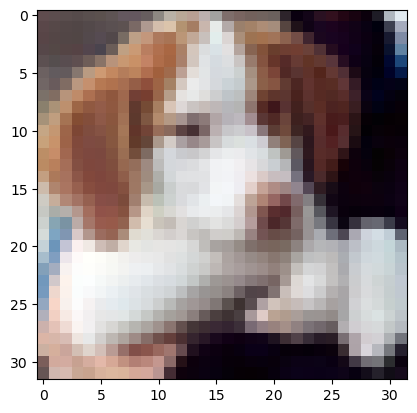

In [74]:
plt.imshow(my_image)

In [75]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [80]:


# Example probabilities vector and output labels list
probabilities = np.array([0.1, 0.3, 0.6, 0.2])  # Example probabilities
output_labels = ['A', 'B', 'C', 'D']             # Example output labels

# Find the highest probability value in the vector
highest_prob_index = np.argmax(probabilities)
highest_prob_value = probabilities[highest_prob_index]
corresponding_output_label = output_labels[highest_prob_index]

# Print the results
print("Highest probability value:", highest_prob_value)
print("Corresponding output label:", corresponding_output_label)


Highest probability value: 0.6
Corresponding output label: C


In [81]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 28ms/step


array([0], dtype=int64)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 16ms/step


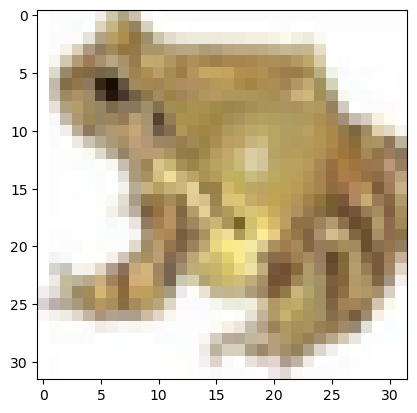

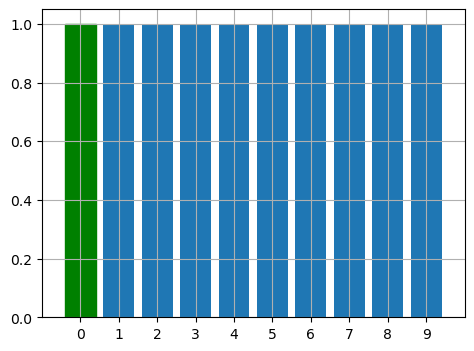

The predicted answer: aircraft 
 Correct answer: frog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [83]:
from tensorflow.keras.preprocessing.image import array_to_img
import random

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


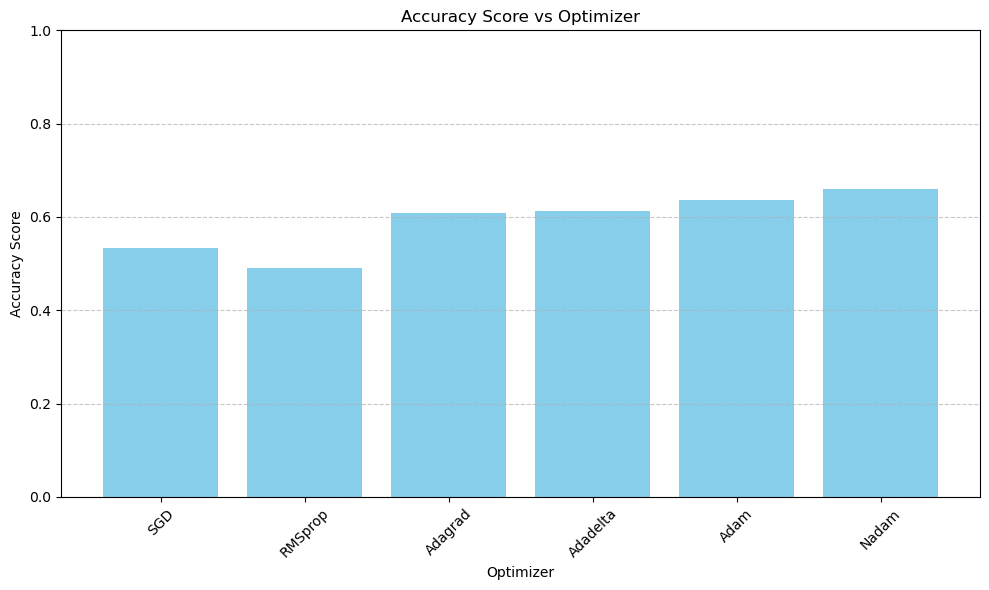

In [84]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Nadam

# Create a list containing the names of optimizers
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']

# Create an empty list to store scores
scores = []

# Define your model
model = Sequential()
model.add(Dense(64, input_dim=100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Dummy data for training
X_train = np.random.rand(1000, 100)
y_train = np.random.randint(2, size=(1000, 1))

# For every optimizer
for opt_name in optimizers:
    # Compile your model with the current optimizer
    optimizer = eval(opt_name)()  # Converting string to optimizer object
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Fit your model
    history = model.fit(X_train, y_train, epochs=3, verbose=0)
    
    # Evaluate the model and append the score to the list
    score = model.evaluate(X_train, y_train, verbose=0)[1]  # Accuracy score
    scores.append(score)

# Plot score vs optimizer
plt.figure(figsize=(10, 6))
plt.bar(optimizers, scores, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Optimizer')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 